# Hotel Customer Segmentation - EDA
##### Lindsey Robertson

## Objective

Investigate outliers, analyze relationships between feaetures and visualize correlations observed. Tell a data story, identify a flow process and KPIs to focus on. Identify the data problem, types of models appropriate for problem, use cases and user story for the iniative. Explore segmentation possibilities. 

## Data

This real-world customer dataset with 31 variables describes
83,590 instances (customers) from a hotel in Lisbon, Portugal.
Instances include; customer personal, behavioral,
demographic, and geographical information for 3 full years.
The dataset can be found on Kaggle [here].(https://www.kaggle.com/datasets/nantonio/a-hotels-customers-dataset)

Kaggle dataset origin, domain assumptions and data collection information: 

Nuno Antonio, Ana de Almeida, Luis Nunes. A hotel's customer's personal, behavioral, demographic, and geographic dataset from Lisbon, Portugal (2015-2018). Data in Brief 33(2020)106583, 24(November), 2020. URL: https://www.sciencedirect.com/journal/data-in-brief.


## Data Assumptions

* Some hotels have a policy of creating a profile for each guest companion(adult or children) only in particular cases and with authorization at times. 
* Typically a customer profile is created by one of three things:
    - customer's first checked-out at the hotel
    - customer's first cancelation
    - customer's first no-show
* Sometimes there are more than one profile for the same customer
* Only after the customer's first stay can hotels confirm the guest's personal details, such as nationality.

## Hypothesis

We can segment these customers based on recency, frequency and monotary value, to predict their future value. 

A separate hypothesis is that we can predict a customer's cancelation or no show with these customer records. 

## Questions to guide analysis:

Revenue:
1) Does zero revenue need to be imputed? If so how? 
2) Can we do a CLV prediction with so much zero revenue data?

KPIs
1) What are the key metrics that will drive the solutions?
2) What are the metrics that will evalutate for a successful initative?

Business data problem
1) What type of business/data problems can be solved?
2) What are bussiness use cases?
3) What is the user story?
4) What kind of models and processes serves this problem best?
5) What features show potential for modeling?
6) How can we better segment the customers for prediction?

Data:
1) Can outliers be removed from data?

## Process:

1) [Categorical feature analysis](#categorical-feature-analysis)
2) [Numerical feature analysis](#numerical-feature-analysis)
3) [Feature relationship analysis](#relationship-analysis)
4) [RFM analysis](#rfm-analysis) 
5) [Tableau data story](#data-story)
    * KPIs and Evaluation
    * DFD
    * Use case and user story


## Import Libraries

In [2]:
pip install plotly

In [3]:
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Import data

Import previous wrangling notebook progress

In [4]:
from IPython.utils import io
with io.capture_output() as captured:
    %run 1_wrangling.ipynb

## Findings from [Wrangling](#https://github.com/LNRobertson/Customer_Segmentation/blob/15479281b783a324f35cb63f255050218e0df417/notebooks/1_Wrangling.ipynb):

1. Outliers cannot be removed in original data as it would remove a customer record.  
2. Most features are not normally distributed. 
3. Some outliers exist in key features that are not normally distributed: BookingsCheckedIn, Canceld, NoShow, LeadTime, Revenues, PersonsNights, and RoomNights. 
    * These nights feature calculations were derived from separate data features I do not have access to. 
    * The PersonsNights value was calculated by summing all customers checked-in bookings’ persons/nights. Person/nights of each booking is the 
      result of the multiplication of the number of staying nights by the sum of adults and children.
    * Room/nights are the multiplication of the number of rooms of each booking by the number of nights.

## Categorical Feature Analysis

Create a separate dataframe which has only categorical variables


In [6]:
data_cat = Data.select_dtypes(include = 'object').copy()
data_cat.head(2).T

0  \
Nationality                                                        PRT   
NameHash             0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...   
DocIDHash            0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...   
DistributionChannel                                          Corporate   
MarketSegment                                                Corporate   

                                                                     1  
Nationality                                                        PRT  
NameHash             0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...  
DocIDHash            0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...  
DistributionChannel                              Travel Agent/Operator  
MarketSegment                                    Travel Agent/Operator

The hash information will be of little use in our analysis and use cases, so should be removed. However, the hash data would be helpful in cases of solutioning for cusotmer input because it is used in name processing to handle variations of inputs.

### Remove unneeded categorical features

The Hash columns are to handle name input processing. I can't see a use for these in our modeling solutions at the moment. Also, this feature is a randomly assigned string that is generated by an name input document. I have a hard time seeing how this could  feature could offer a relationship to customer value and behavior that will prove useful beyond what the other features can offer.  

In [7]:
clean_data = Data.drop(['NameHash', 'DocIDHash'], axis=1)

In [8]:
clean_data.head()

ID Nationality   Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
0   1         PRT  51.0                150               45           371.0   
1   2         PRT   0.0               1095               61           280.0   
2   3         DEU  31.0               1095                0             0.0   
3   4         FRA  60.0               1095               93           240.0   
4   5         FRA  51.0               1095                0             0.0   

   OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  ...  \
0         105.3                 1                 0                  3  ...   
1          53.0                 0                 0                  1  ...   
2           0.0                 0                 0                  0  ...   
3          60.0                 0                 0                  1  ...   
4           0.0                 0                 0                  0  ...   

   SRMediumFloor  SRBathtub  SRShower  SRCrib SRKingSizeBed SRTwinBed  \
0              0          0         0       0             0         0   
1              0          0         0       0             0         0   
2              0          0         0       0             0         0   
3              0          0         0       0             0         0   
4              0          0         0       0             0         0   

   SRNearElevator  SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
0               0                   0                     0            0  
1               0                   0                     0            0  
2               0                   0                     0            0  
3               0                   0                     0            0  
4               0                   0                     0            0  

[5 rows x 29 columns]

### Nationality

In [9]:
nationality = Data['Nationality'].nunique()
print(nationality)

188


Let's look at the top nationalities of our customer base.

In [10]:
top_nationality = Data['Nationality'].value_counts().head(20)
fig = px.pie( values = top_nationality.values,names=top_nationality.keys(), title='Distributoion of Nationalities')
fig.show()


In [11]:
 top_nationality


FRA    12422
PRT    11597
DEU    10232
GBR     8656
ESP     4902
USA     3429
ITA     3365
BEL     3119
BRA     2902
NLD     2725
CHE     2108
IRL     1996
CAN     1524
AUT     1489
SWE     1231
ISR      900
CHN      891
NOR      795
POL      760
AUS      723
Name: Nationality, dtype: int64

In [12]:
top_nationalities = Data.sort_values(by= ['Nationality'])

top_nationalities = top_nationalities[top_nationalities.groupby('Nationality').cumcount() > 1000]

In [13]:
len(top_nationalities.Nationality.value_counts())



15

[Text(0, 0, '488'),
 Text(0, 0, '2118'),
 Text(0, 0, '1901'),
 Text(0, 0, '523'),
 Text(0, 0, '1107'),
 Text(0, 0, '9231'),
 Text(0, 0, '3901'),
 Text(0, 0, '11421'),
 Text(0, 0, '7655'),
 Text(0, 0, '995'),
 Text(0, 0, '2364'),
 Text(0, 0, '1724'),
 Text(0, 0, '10596'),
 Text(0, 0, '230'),
 Text(0, 0, '2428')]

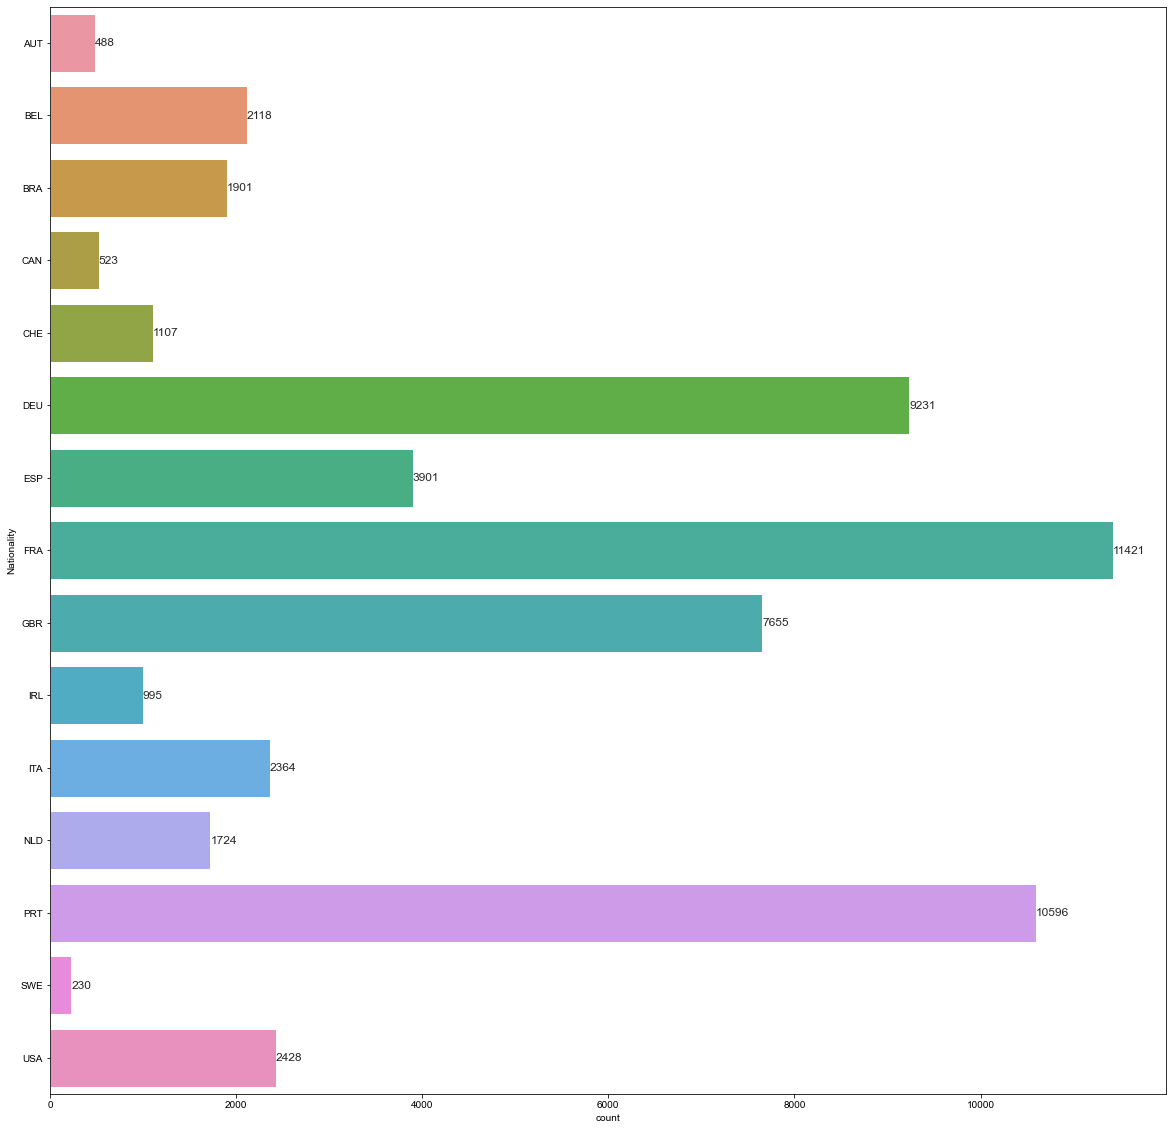

In [14]:
#Visualize the styles and their ratings ocurrance. 
fig, ax = plt.subplots(figsize=(20,20))

Nationalities = top_nationalities.select_dtypes(include = 'object').copy()

#get counts of variables
Nationalities.Nationality.value_counts()

#count plot for one variable
sns.set(rc = {'figure.figsize':(20,30)})
sns.countplot(y= 'Nationality', data = Nationalities)

ax.bar_label(ax.containers[0])

Many of these nationalities are a minor percentage of the total customer base. We can reduce the feature categories by the number of nationaltiies with less than 5% representation to see where that leaves us. This is too many categories to visualize and analyze, we need to reduce the category cardinality in this feature to better work with it moving forward in modeling as well. Dropping customer records are not an option.

Create a new column for \"TopNations\" to group all countries with under 1000 customers into \"Other\" This should give us 16 rather than 188 unique values to visualize and model. We will maintain the original Nationality column in the dataset so the \"Other\" categories can be qurried for their actual country."

In [15]:
TopNation = []

nation_dict = {'AUT': 'AUT', 
                'BEL': 'BEL', 
                'BRA': 'BRA', 
                'CAN': 'CAN', 
                'CHE': 'CHE', 
                'DEU': 'DEU', 
                'ESP': 'ESP', 
                'FRA': 'FRA', 
                'GBR': 'GBR',
                'RL': 'RL',
                'ITA': 'ITA',
                'NLD': 'NLD',
                'PRT': 'PRT',
                'SWE': 'SWE',
                'USA': 'USA'  }

clean_data['Country'] = clean_data['Nationality'].map(nation_dict).fillna('Other')


In [16]:
clean_data.Country.head(100)

0       PRT
1       PRT
2       DEU
3       FRA
4       FRA
      ...  
95      ESP
96      ESP
97      ESP
98      ESP
99    Other
Name: Country, Length: 100, dtype: object

What does the distribution of top nationalities look like?

In [17]:
top_nationalities.describe()

ID           Age  DaysSinceCreation  AverageLeadTime  \
count  56682.000000  56682.000000       56682.000000     56682.000000   
mean   40468.085618     42.834339         472.256413        68.691101   
std    24469.353978     19.519301         319.267180        91.050456   
min        1.000000      0.000000           0.000000        -1.000000   
25%    19280.250000     31.000000         185.000000         0.000000   
50%    39520.500000     45.000000         433.000000        31.000000   
75%    61713.750000     56.000000         761.000000       106.000000   
max    83589.000000     92.000000        1095.000000       588.000000   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
count    56682.000000  56682.000000      56682.000000      56682.000000   
mean       292.536917     69.848855          0.002435          0.000741   
std        365.635400    119.120630          0.075098          0.031980   
min          0.000000      0.000000          0.000000          0.000000   
25%         70.400000      4.000000          0.000000          0.000000   
50%        230.200000     42.000000          0.000000          0.000000   
75%        390.600000     90.200000          0.000000          0.000000   
max      21781.000000   7730.250000          9.000000          3.000000   

       BookingsCheckedIn  PersonsNights  ...  SRMediumFloor     SRBathtub  \
count       56682.000000   56682.000000  ...   56682.000000  56682.000000   
mean            0.809693       4.680445  ...       0.000812      0.002629   
std             0.748129       4.507534  ...       0.028476      0.051204   
min             0.000000       0.000000  ...       0.000000      0.000000   
25%             1.000000       1.000000  ...       0.000000      0.000000   
50%             1.000000       4.000000  ...       0.000000      0.000000   
75%             1.000000       7.000000  ...       0.000000      0.000000   
max            66.000000     116.000000  ...       1.000000      1.000000   

           SRShower        SRCrib  SRKingSizeBed     SRTwinBed  \
count  56682.000000  56682.000000   56682.000000  56682.000000   
mean       0.001923      0.013196       0.343425      0.138880   
std        0.043810      0.114116       0.474856      0.345824   
min        0.000000      0.000000       0.000000      0.000000   
25%        0.000000      0.000000       0.000000      0.000000   
50%        0.000000      0.000000       0.000000      0.000000   
75%        0.000000      0.000000       1.000000      0.000000   
max        1.000000      1.000000       1.000000      1.000000   

       SRNearElevator  SRAwayFromElevator  SRNoAlcoholInMiniBar   SRQuietRoom  
count    56682.000000        56682.000000          56682.000000  56682.000000  
mean         0.000370            0.003528              0.000053      0.086059  
std          0.019245            0.059296              0.007275      0.280454  
min          0.000000            0.000000              0.000000      0.000000  
25%          0.000000            0.000000              0.000000      0.000000  
50%          0.000000            0.000000              0.000000      0.000000  
75%          0.000000            0.000000              0.000000      0.000000  
max          1.000000            1.000000              1.000000      1.000000  

[8 rows x 26 columns]

<AxesSubplot:xlabel='Age', ylabel='Nationality'>

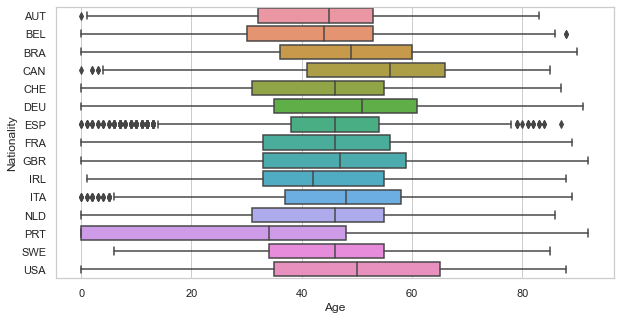

In [18]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='Age', y="Nationality", data=top_nationalities)

<AxesSubplot:xlabel='LodgingRevenue', ylabel='Nationality'>

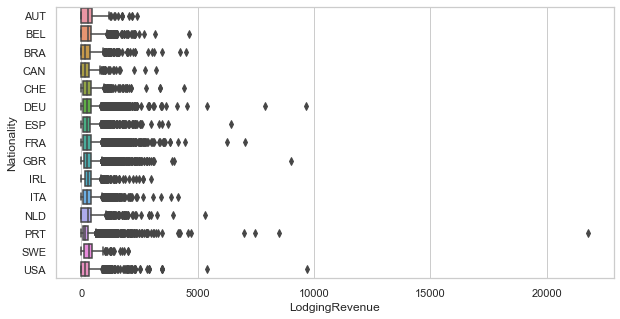

In [19]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='LodgingRevenue', y="Nationality", data=top_nationalities)

<AxesSubplot:xlabel='OtherRevenue', ylabel='Nationality'>

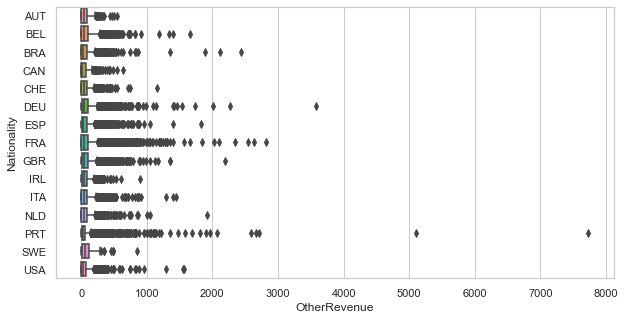

In [20]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='OtherRevenue', y="Nationality", data=top_nationalities)

<AxesSubplot:xlabel='RoomNights', ylabel='Nationality'>

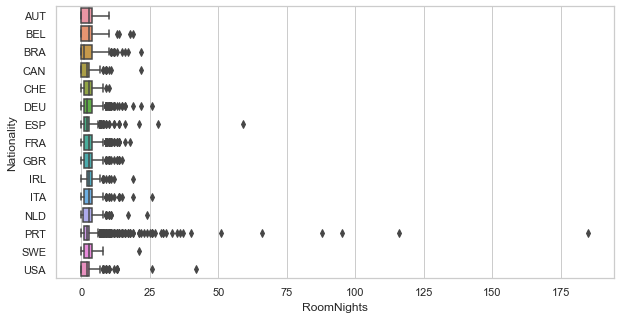

In [21]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='RoomNights', y="Nationality", data=top_nationalities)

<AxesSubplot:xlabel='DaysSinceLastStay', ylabel='Nationality'>

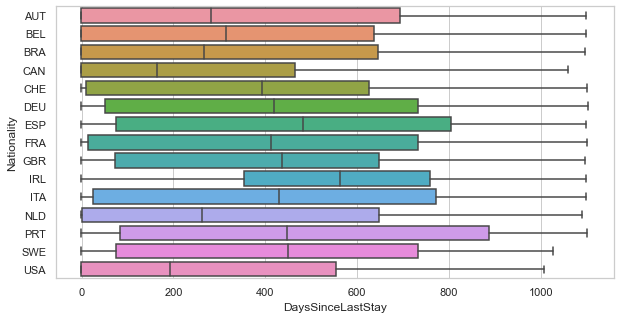

In [22]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='DaysSinceLastStay', y="Nationality", data=top_nationalities)

<AxesSubplot:xlabel='DaysSinceFirstStay', ylabel='Nationality'>

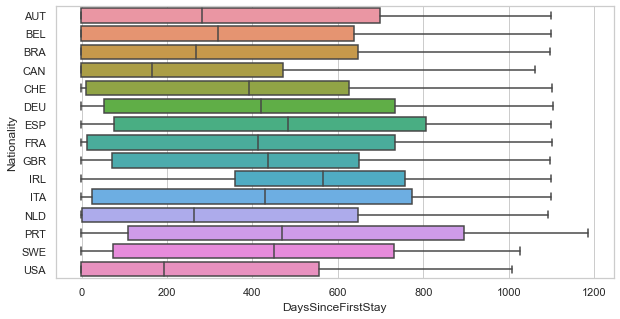

In [23]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='DaysSinceFirstStay', y="Nationality", data=top_nationalities)

### Distribution Channel

Check for imbalance and correlations in the different ways customers make bookings at the hotel. 

Travel Agent/Operator      68569
Direct                     11912
Corporate                   2600
Electronic Distribution      509
Name: DistributionChannel, dtype: int64


<AxesSubplot:xlabel='count', ylabel='DistributionChannel'>

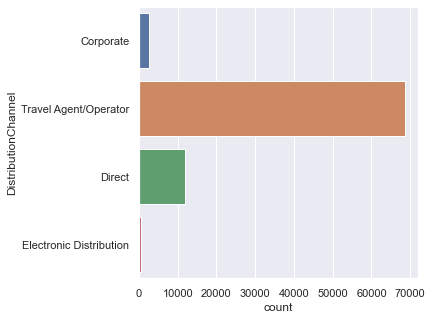

In [24]:
print(clean_data.DistributionChannel.value_counts())


#count plot for one variable
sns.set(rc = {'figure.figsize':(5,5)})
sns.countplot(y= 'DistributionChannel', data = clean_data)

<AxesSubplot:xlabel='Age', ylabel='DistributionChannel'>

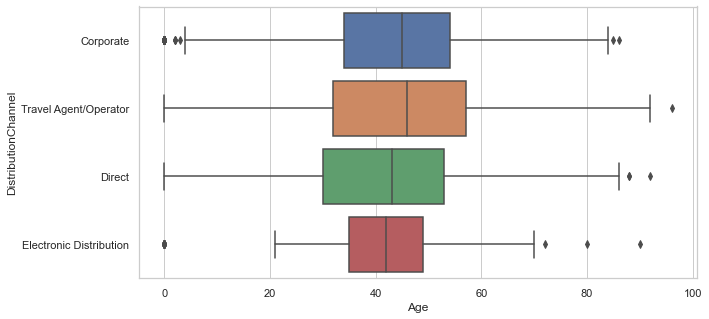

In [25]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='Age', y="DistributionChannel", data=clean_data)

<AxesSubplot:xlabel='LodgingRevenue', ylabel='DistributionChannel'>

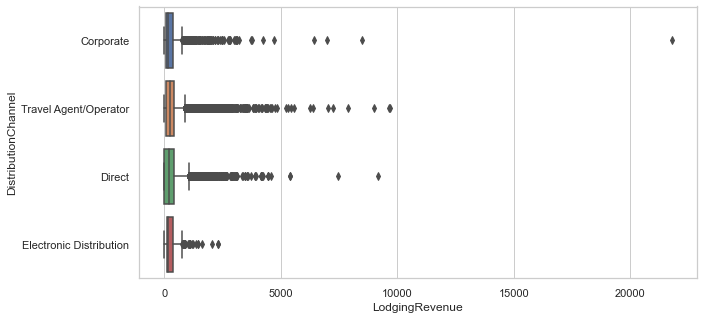

In [26]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='LodgingRevenue', y="DistributionChannel", data=clean_data)

<AxesSubplot:xlabel='OtherRevenue', ylabel='DistributionChannel'>

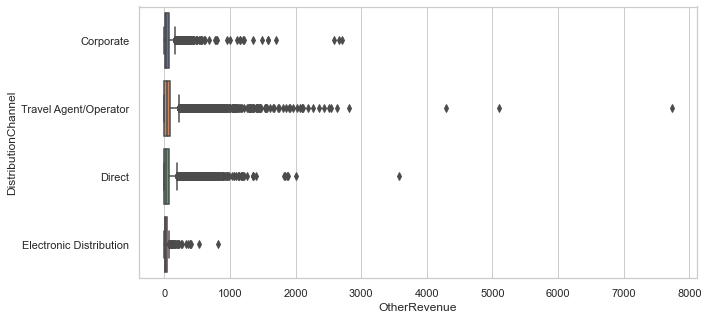

In [27]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='OtherRevenue', y="DistributionChannel", data=clean_data)

<AxesSubplot:xlabel='RoomNights', ylabel='DistributionChannel'>

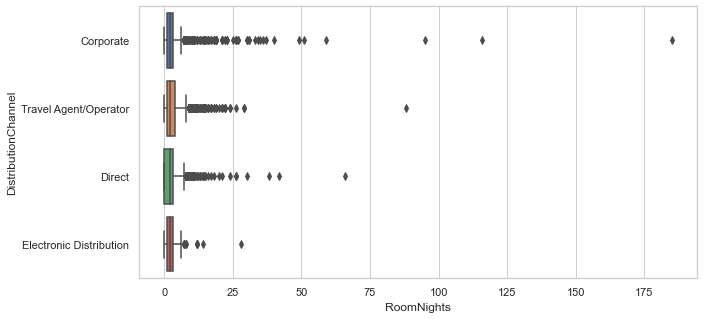

In [28]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='RoomNights', y="DistributionChannel", data=clean_data)

<AxesSubplot:xlabel='DaysSinceLastStay', ylabel='DistributionChannel'>

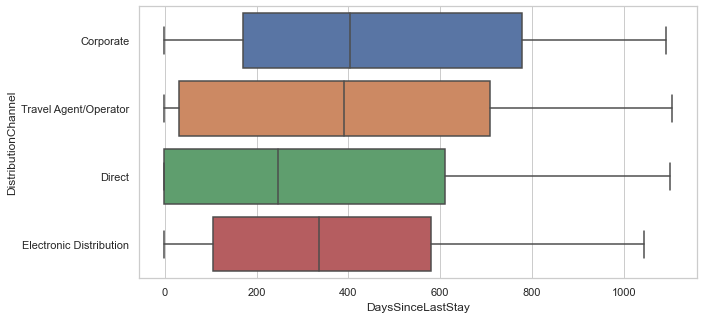

In [29]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='DaysSinceLastStay', y="DistributionChannel", data=clean_data)

<AxesSubplot:xlabel='DaysSinceFirstStay', ylabel='DistributionChannel'>

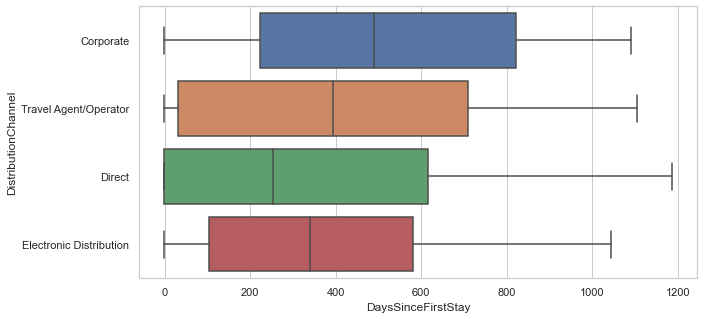

In [30]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='DaysSinceFirstStay', y="DistributionChannel", data=clean_data)

### Marketing Segment

Check for imbalance and correlations in the current market segements customers belong to. 

Other                    48039
Travel Agent/Operator    11670
Direct                   11457
Groups                    9501
Corporate                 2169
Complementary              510
Aviation                   244
Name: MarketSegment, dtype: int64


<AxesSubplot:xlabel='count', ylabel='MarketSegment'>

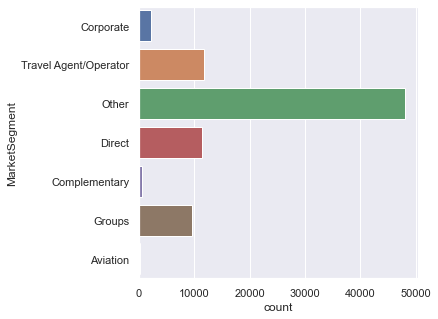

In [31]:
print(clean_data.MarketSegment.value_counts())


#count plot for one variable
sns.set(rc = {'figure.figsize':(5,5)})
sns.countplot(y= 'MarketSegment', data = clean_data)

<AxesSubplot:xlabel='Age', ylabel='MarketSegment'>

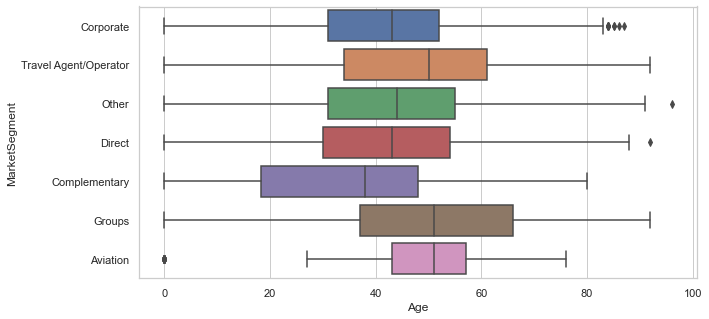

In [32]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='Age', y="MarketSegment", data=clean_data)

<AxesSubplot:xlabel='LodgingRevenue', ylabel='MarketSegment'>

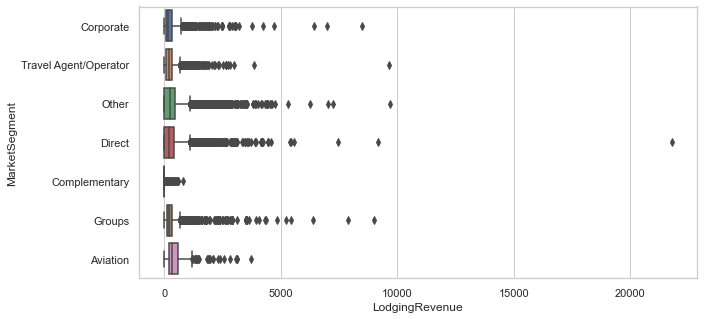

In [33]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='LodgingRevenue', y="MarketSegment", data=clean_data)

<AxesSubplot:xlabel='OtherRevenue', ylabel='MarketSegment'>

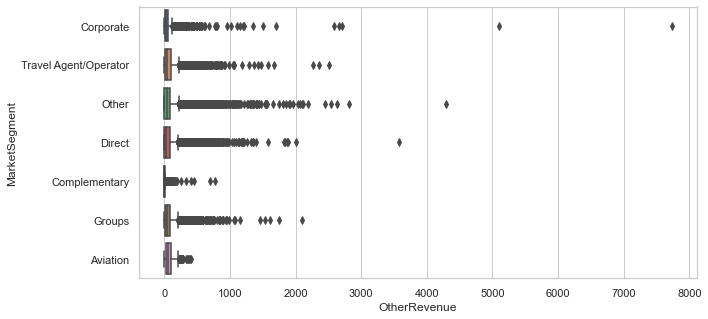

In [34]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='OtherRevenue', y="MarketSegment", data=clean_data)

<AxesSubplot:xlabel='RoomNights', ylabel='MarketSegment'>

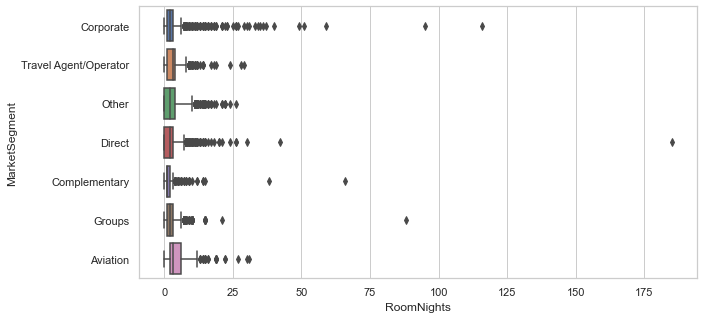

In [35]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='RoomNights', y="MarketSegment", data=clean_data)

<AxesSubplot:xlabel='DaysSinceLastStay', ylabel='MarketSegment'>

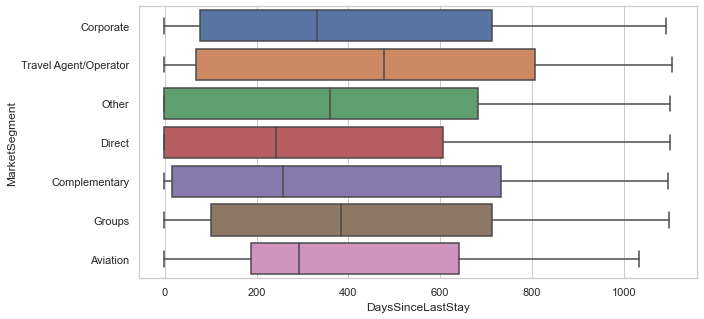

In [36]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='DaysSinceLastStay', y="MarketSegment", data=clean_data)

<AxesSubplot:xlabel='DaysSinceFirstStay', ylabel='MarketSegment'>

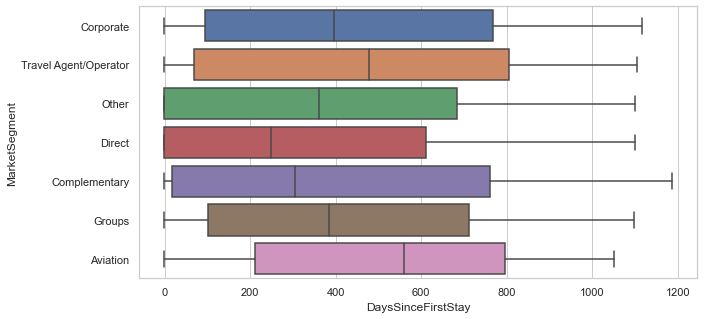

In [37]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='DaysSinceFirstStay', y="MarketSegment", data=clean_data)

## Numerical Feature Analysis

In [38]:
clean_data.describe().T

count          mean           std  min       25%  \
ID                    83590.0  41795.500000  24130.498838  1.0  20898.25   
Age                   83590.0     43.336236     18.728542  0.0     32.00   
DaysSinceCreation     83590.0    453.640902    313.390291  0.0    177.00   
AverageLeadTime       83590.0     66.196028     87.758990 -1.0      0.00   
LodgingRevenue        83590.0    298.802087    372.851892  0.0     59.00   
OtherRevenue          83590.0     67.589132    114.327776  0.0      2.00   
BookingsCanceled      83590.0      0.002022      0.066770  0.0      0.00   
BookingsNoShowed      83590.0      0.000634      0.029545  0.0      0.00   
BookingsCheckedIn     83590.0      0.794617      0.695778  0.0      1.00   
PersonsNights         83590.0      4.649133      4.567673  0.0      1.00   
RoomNights            83590.0      2.358536      2.281746  0.0      1.00   
DaysSinceLastStay     83590.0    401.067137    347.204955 -1.0     26.00   
DaysSinceFirstStay    83590.0    403.349013    347.971089 -1.0     27.00   
SRHighFloor           83590.0      0.047482      0.212668  0.0      0.00   
SRLowFloor            83590.0      0.001412      0.037546  0.0      0.00   
SRAccessibleRoom      83590.0      0.000251      0.015848  0.0      0.00   
SRMediumFloor         83590.0      0.000873      0.029539  0.0      0.00   
SRBathtub             83590.0      0.002847      0.053284  0.0      0.00   
SRShower              83590.0      0.001711      0.041326  0.0      0.00   
SRCrib                83590.0      0.013219      0.114213  0.0      0.00   
SRKingSizeBed         83590.0      0.352686      0.477809  0.0      0.00   
SRTwinBed             83590.0      0.142541      0.349606  0.0      0.00   
SRNearElevator        83590.0      0.000335      0.018299  0.0      0.00   
SRAwayFromElevator    83590.0      0.003505      0.059101  0.0      0.00   
SRNoAlcoholInMiniBar  83590.0      0.000120      0.010937  0.0      0.00   
SRQuietRoom           83590.0      0.088372      0.283837  0.0      0.00   

                          50%        75%       max  
ID                    41795.5  62692.750  83590.00  
Age                      45.0     56.000     96.00  
DaysSinceCreation       397.0    723.000   1095.00  
AverageLeadTime          29.0    103.000    588.00  
LodgingRevenue          234.0    402.000  21781.00  
OtherRevenue             38.5     87.675   7730.25  
BookingsCanceled          0.0      0.000      9.00  
BookingsNoShowed          0.0      0.000      3.00  
BookingsCheckedIn         1.0      1.000     66.00  
PersonsNights             4.0      6.000    116.00  
RoomNights                2.0      4.000    185.00  
DaysSinceLastStay       366.0    693.000   1104.00  
DaysSinceFirstStay      369.0    697.000   1186.00  
SRHighFloor               0.0      0.000      1.00  
SRLowFloor                0.0      0.000      1.00  
SRAccessibleRoom          0.0      0.000      1.00  
SRMediumFloor             0.0      0.000      1.00  
SRBathtub                 0.0      0.000      1.00  
SRShower                  0.0      0.000      1.00  
SRCrib                    0.0      0.000      1.00  
SRKingSizeBed             0.0      1.000      1.00  
SRTwinBed                 0.0      0.000      1.00  
SRNearElevator            0.0      0.000      1.00  
SRAwayFromElevator        0.0      0.000      1.00  
SRNoAlcoholInMiniBar      0.0      0.000      1.00  
SRQuietRoom               0.0      0.000      1.00

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DaysSinceCreation'}>,
        <AxesSubplot:title={'center':'AverageLeadTime'}>,
        <AxesSubplot:title={'center':'LodgingRevenue'}>],
       [<AxesSubplot:title={'center':'OtherRevenue'}>,
        <AxesSubplot:title={'center':'BookingsCanceled'}>,
        <AxesSubplot:title={'center':'BookingsNoShowed'}>,
        <AxesSubplot:title={'center':'BookingsCheckedIn'}>,
        <AxesSubplot:title={'center':'PersonsNights'}>],
       [<AxesSubplot:title={'center':'RoomNights'}>,
        <AxesSubplot:title={'center':'DaysSinceLastStay'}>,
        <AxesSubplot:title={'center':'DaysSinceFirstStay'}>,
        <AxesSubplot:title={'center':'SRHighFloor'}>,
        <AxesSubplot:title={'center':'SRLowFloor'}>],
       [<AxesSubplot:title={'center':'SRAccessibleRoom'}>,
        <AxesSubplot:title={'center':'SRMediumFloor'}>,
        <AxesSubplot:title={'center':'SRBathtu

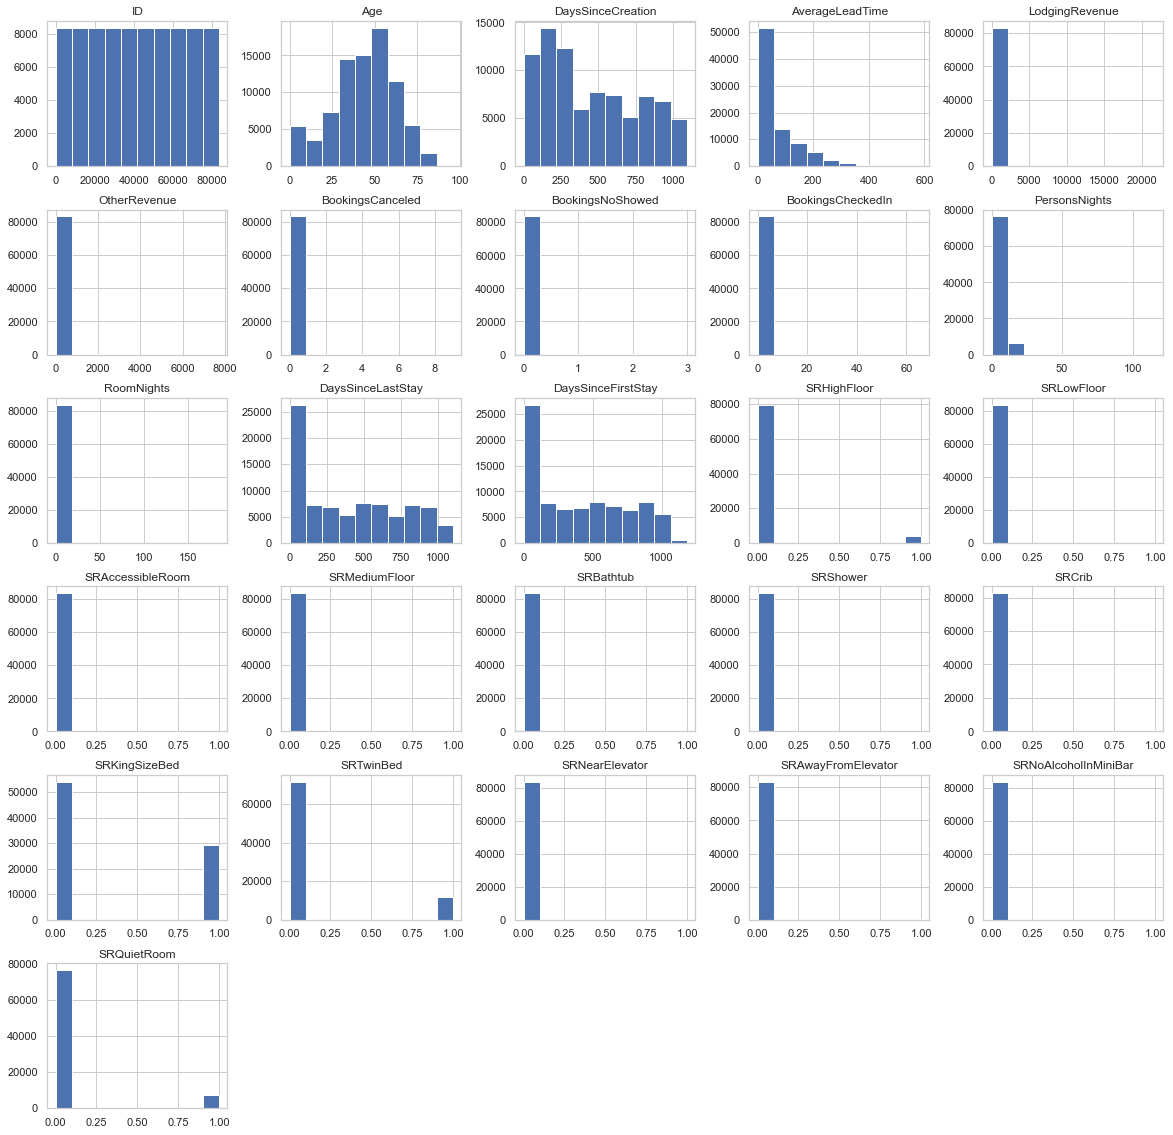

In [39]:
clean_data.hist(figsize=(20,20))

<AxesSubplot:>

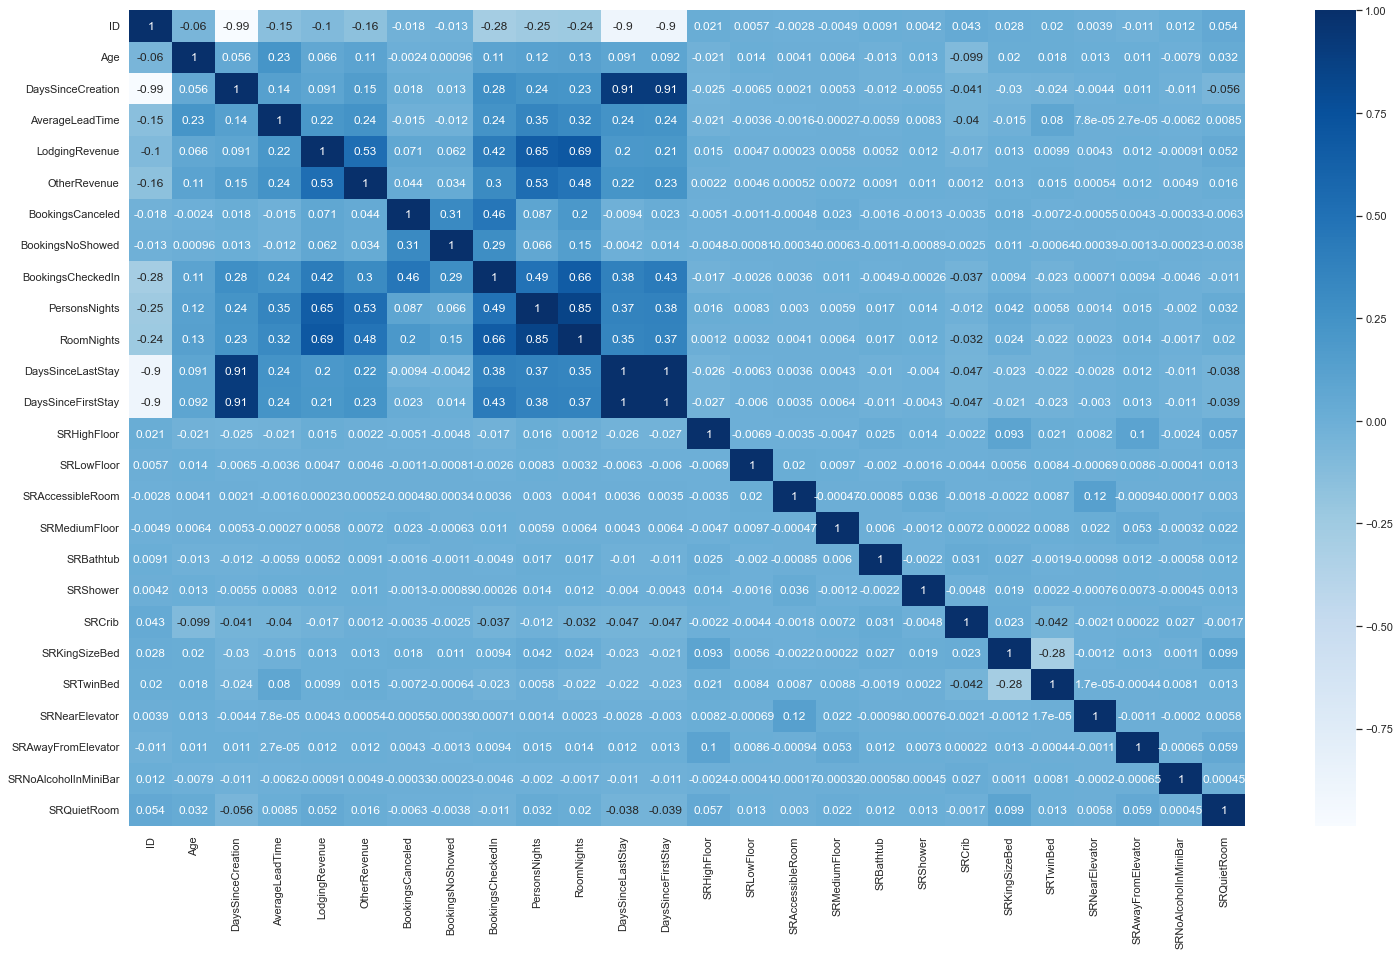

In [40]:
fig, ax = plt.subplots(figsize=(25, 15))

clean_corr = clean_data.corr()
sns.heatmap(clean_corr, cmap="Blues", annot= True,
        xticklabels=clean_corr.columns,
        yticklabels=clean_corr.columns)

No noteworthy correlated numerical pairs to observe unfortunately. 

### Revenues

In [41]:
clean_data['TotalRevenue'] = clean_data['LodgingRevenue'] + clean_data['OtherRevenue']

In [42]:
clean_data.TotalRevenue.head()

0    476.3
1    333.0
2      0.0
3    300.0
4      0.0
Name: TotalRevenue, dtype: float64

Total Revenue for Market Segement

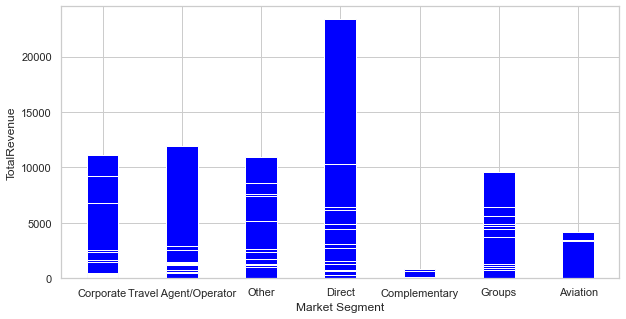

In [43]:
fig = plt.figure(figsize = (10, 5))

plt.bar(clean_data.MarketSegment, clean_data.TotalRevenue, color = 'blue',
        width = .4)

plt.xlabel("Market Segment")
plt.ylabel("TotalRevenue")
plt.show()

Total Revenue for Age

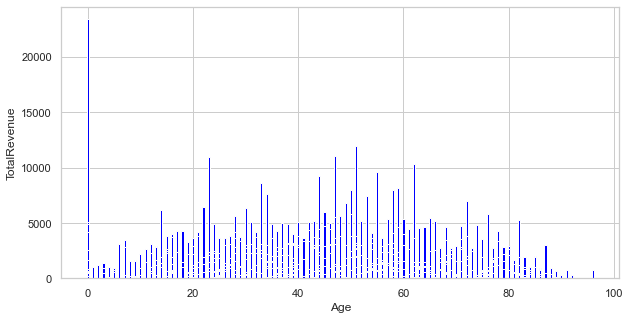

In [44]:
fig = plt.figure(figsize = (10, 5))

plt.bar(clean_data.Age, clean_data.TotalRevenue, color = 'blue',
        width = .4)

bins = (10)

plt.xlabel("Age")
plt.ylabel("TotalRevenue")
plt.show()

Total Revenue for Distribution Channel

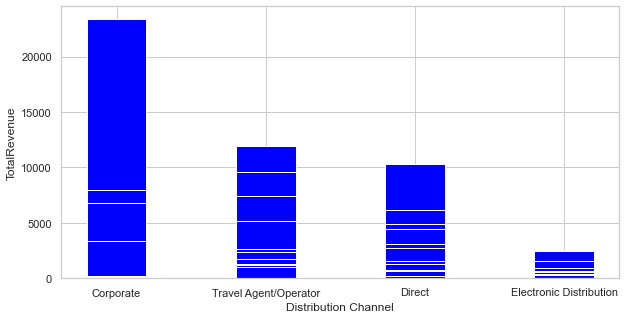

In [45]:
fig = plt.figure(figsize = (10, 5))

plt.bar(clean_data.DistributionChannel, clean_data.TotalRevenue, color = 'blue',
        width = .4)

plt.xlabel("Distribution Channel")
plt.ylabel("TotalRevenue")
plt.show()

Revenue and Country

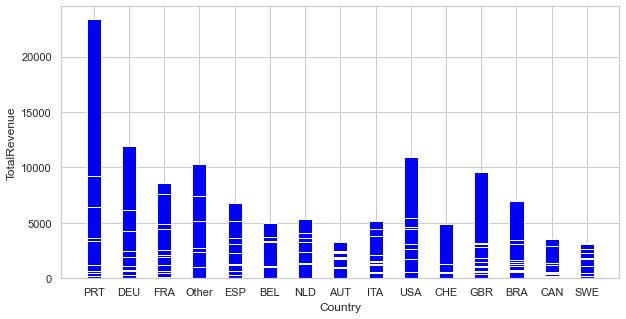

In [46]:
fig = plt.figure(figsize = (10, 5))

plt.bar(clean_data.Country, clean_data.TotalRevenue, color = 'blue',
        width = .4)

plt.xlabel("Country")
plt.ylabel("TotalRevenue")
plt.show()

Average Revenue Per Customer

In [48]:
clean_data['TotalRevenue'].mean()

366.39121892571745

Distribution of new customers. 

<AxesSubplot:>

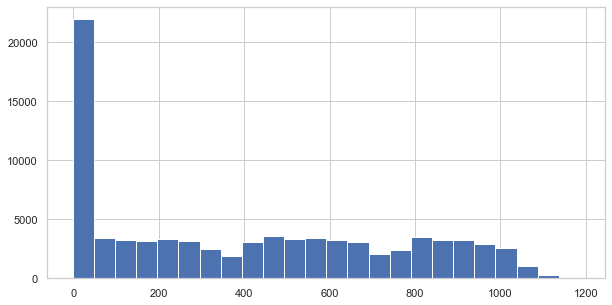

In [49]:
#closer view of this histogram
clean_data['DaysSinceFirstStay'].hist(bins=24)

Average days since confirmed first stay to see the average cusotmer lifetime span. 

In [50]:
clean_data['DaysSinceFirstStay'].mean()

403.3490130398373

Increasing this number would represent loyality and decreasing would indicate more cuosmter aquisition. This should be a metric checked for each business goal. 

## Relationship Analysis

### Pair Plots 

Subset the data into numerical features only. 

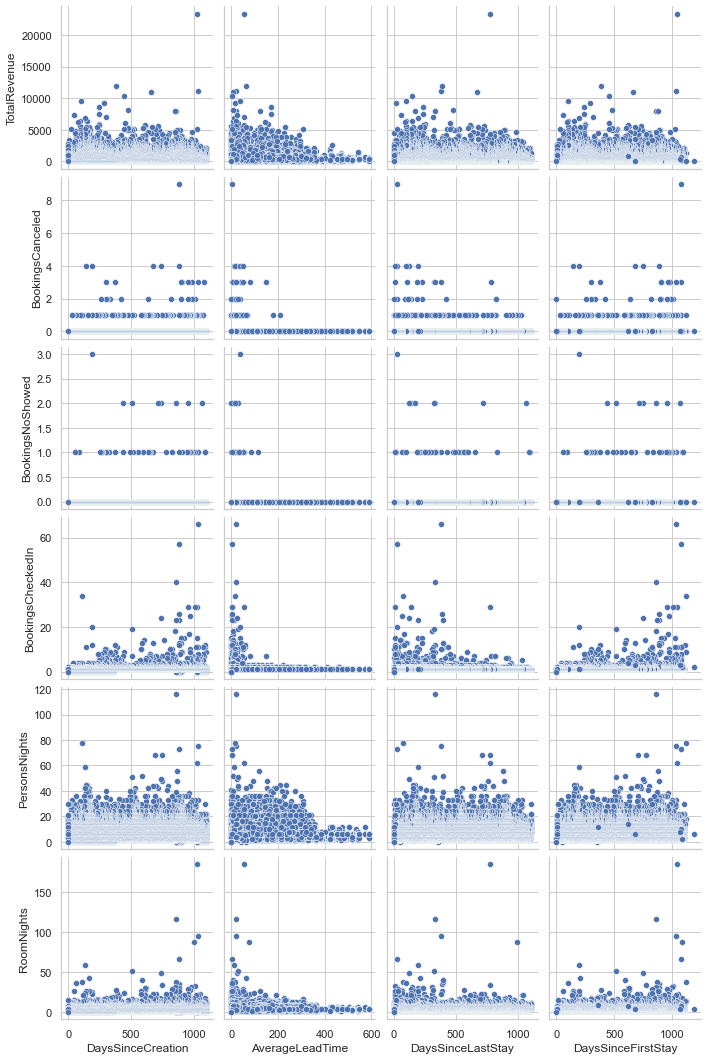

In [51]:
sns.pairplot(
    clean_data,
    x_vars=["DaysSinceCreation", "AverageLeadTime", "DaysSinceLastStay", "DaysSinceFirstStay"],
    y_vars=["TotalRevenue", "BookingsCanceled", "BookingsNoShowed", "BookingsCheckedIn", "PersonsNights", "RoomNights"],)

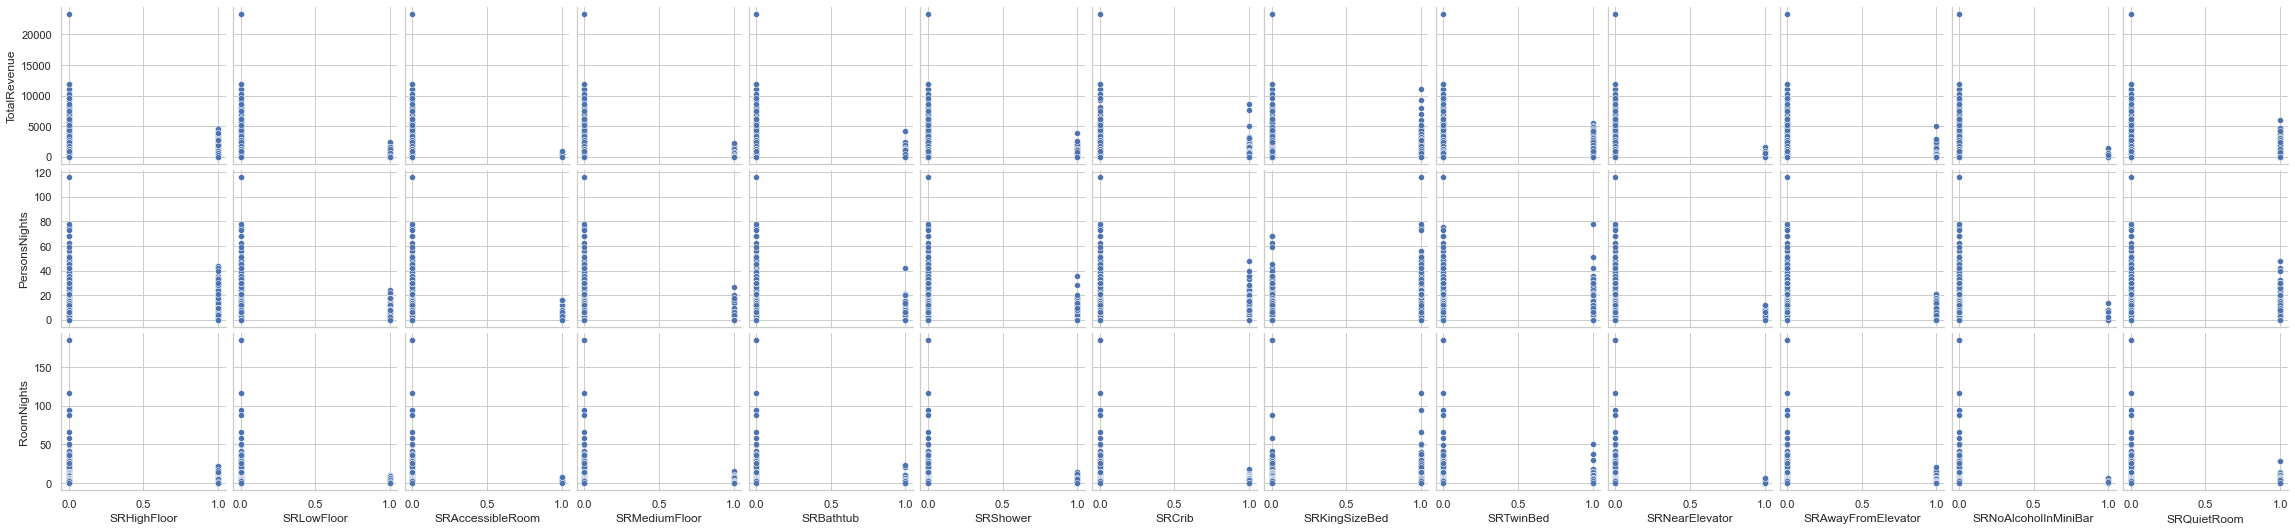

In [52]:
sns.pairplot(
    clean_data,
    x_vars=["SRHighFloor", "SRLowFloor", "SRAccessibleRoom", "SRMediumFloor", "SRBathtub", "SRShower", "SRCrib","SRKingSizeBed", "SRTwinBed", "SRNearElevator", "SRAwayFromElevator", "SRNoAlcoholInMiniBar", "SRQuietRoom"],
    y_vars=["TotalRevenue", "PersonsNights", "RoomNights"],)




## RFM Analysis

The customers are already segmented based on the market into 7 categories with the majority of the customers belonging to an "Other" category. While indicating what domain these customers belong to, the listed market types, the "Other" category could relate to traveling individuals with no known market category and thus shows a need to create one. Or better yet, add another layer of segmentation based on value, demographic, geographic and behavioral personas that will make anticipating and understanding the largest market segment better.  

In order to accomplish this, let's start by seeing how we can create value segments based on common and important business metrics;  recency, frequency and monotary value. By doing this, customer will have a Recency, Frequency and Value scoring that can assist with more detailed segmentation in further.

### Recency

How long has it been since each customer has stayed?

Create a recency dataframe to assign customer recency scores in based on the days since the last stay which are already calculated for us. 

In [53]:
recency = clean_data[['ID','DaysSinceLastStay']]
recency.columns = ['ID', 'Recency']

In [54]:
recency.head()

ID  Recency
0   1      151
1   2     1100
2   3       -1
3   4     1100
4   5       -1

### Frequency

How often does each customer stay? 

Create a frequency dataframe to store the frequency score based on rooms and nights booked. Total of room/nights the customer stayed at the hotel (checked-in bookings). Room/nights are the multiplication of the number of rooms of each booking by the number of nights of the booking.


In [55]:
frequency = clean_data[['ID','RoomNights']]
frequency.columns = ['ID', 'Frequency']

In [56]:
frequency.head()

ID  Frequency
0   1          5
1   2          5
2   3          0
3   4          5
4   5          0

### Monetary Value

Monetary Value of the Customer will be based on the total revenue of the customer that is the sum of Lodging and Other revenues. 

In [57]:
monetary = clean_data[['ID','TotalRevenue']]
monetary.columns = ['ID', 'Monetary']

In [58]:
monetary.head()

ID  Monetary
0   1     476.3
1   2     333.0
2   3       0.0
3   4     300.0
4   5       0.0

Merge all columns into a the rfm dataframe 

In [59]:
rfm = pd.merge(recency, frequency, on='ID', how='inner')
rfm = pd.merge(rfm, monetary, on='ID', how='inner')
rfm.columns = ['ID', 'Recency', 'Frequency', 'Monetary']
rfm

ID  Recency  Frequency  Monetary
0          1      151          5     476.3
1          2     1100          5     333.0
2          3       -1          0       0.0
3          4     1100          5     300.0
4          5       -1          0       0.0
...      ...      ...        ...       ...
83585  83586       -1          0       0.0
83586  83587        3          3     604.6
83587  83588       -1          0       0.0
83588  83589        3          3     990.3
83589  83590       -1          0       0.0

[83590 rows x 4 columns]

Check rfm variable distribtion 

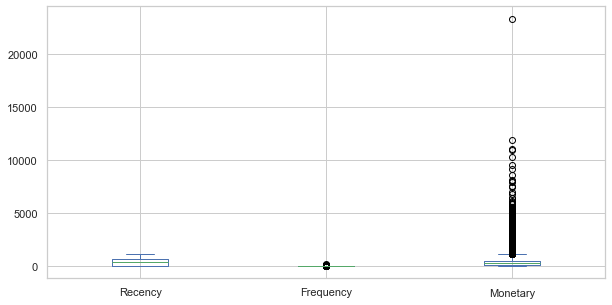

In [60]:
RFMplot = pd.DataFrame(data = rfm, columns = ['Recency','Frequency','Monetary'])

RFMplot.plot(kind='box')
plt.show()

Value ranges are very spread out not aligning well with all the variables. Our dataframe needs normalization so all variables can work on the same scale 

In [61]:
scaler = StandardScaler()

rfm_normalized = rfm[['Recency', 'Frequency', 'Monetary']]

rfm_normalized

Recency  Frequency  Monetary
0          151          5     476.3
1         1100          5     333.0
2           -1          0       0.0
3         1100          5     300.0
4           -1          0       0.0
...        ...        ...       ...
83585       -1          0       0.0
83586        3          3     604.6
83587       -1          0       0.0
83588        3          3     990.3
83589       -1          0       0.0

[83590 rows x 3 columns]

In [62]:
rfm_normalized = scaler.fit_transform(rfm_normalized)
rfm_normalized = pd.DataFrame(rfm_normalized)
rfm_normalized

0         1         2
0     -0.720233  1.157658  0.247655
1      2.013039  1.157658 -0.075240
2     -1.158018 -1.033660 -0.825581
3      2.013039  1.157658 -0.149598
4     -1.158018 -1.033660 -0.825581
...         ...       ...       ...
83585 -1.158018 -1.033660 -0.825581
83586 -1.146497  0.281130  0.536751
83587 -1.158018 -1.033660 -0.825581
83588 -1.146497  0.281130  1.405840
83589 -1.158018 -1.033660 -0.825581

[83590 rows x 3 columns]

<AxesSubplot:>

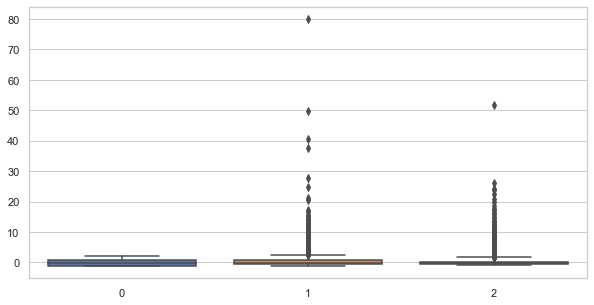

In [63]:
sns.boxplot(data=rfm_normalized)

Merge rfm dataframe into our main customer dataframe to use in Tableau visualization. Our RFM dataframe will be used in the next step to further cluster our customers, try to predict their lifetime value and their churn(cancel or no show) probability. 

In [64]:
hotel_customer_rfm = pd.merge(clean_data, rfm, on='ID', how='inner')

In [67]:
hotel_customer_rfm.head()

ID Nationality   Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
0   1         PRT  51.0                150               45           371.0   
1   2         PRT   0.0               1095               61           280.0   
2   3         DEU  31.0               1095                0             0.0   
3   4         FRA  60.0               1095               93           240.0   
4   5         FRA  51.0               1095                0             0.0   

   OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  ...  \
0         105.3                 1                 0                  3  ...   
1          53.0                 0                 0                  1  ...   
2           0.0                 0                 0                  0  ...   
3          60.0                 0                 0                  1  ...   
4           0.0                 0                 0                  0  ...   

   SRTwinBed  SRNearElevator  SRAwayFromElevator  SRNoAlcoholInMiniBar  \
0          0               0                   0                     0   
1          0               0                   0                     0   
2          0               0                   0                     0   
3          0               0                   0                     0   
4          0               0                   0                     0   

  SRQuietRoom Country  TotalRevenue  Recency  Frequency  Monetary  
0           0     PRT         476.3      151          5     476.3  
1           0     PRT         333.0     1100          5     333.0  
2           0     DEU           0.0       -1          0       0.0  
3           0     FRA         300.0     1100          5     300.0  
4           0     FRA           0.0       -1          0       0.0  

[5 rows x 34 columns]

## Data Story

### Create new clean data flat file including transformations made in EDA to use in Tableau analysis. 

In [66]:
file_name = 'Hotel_Customer_RFM.xlsx' 

hotel_customer_rfm.to_excel('Hotel_Customer_RFM.xlsx')


### Visit this further data story analysis on [Tableau Public](#https://public.tableau.com/app/profile/lnrobertson/viz/Hotel_Customer_Segmentation/Hotel_Customer_Segmentation?publish=yes)

* Visualizations
* Data Flow Diagrams 
* Business Problem and Solution Process. 